In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\POP.csv")
df

,realtime_start,value,date,realtime_end
0,2019-12-06,156309.000,1952-01-01,2019-12-06
1,2019-12-06,156527.000,1952-02-01,2019-12-06
2,2019-12-06,156731.000,1952-03-01,2019-12-06
3,2019-12-06,156943.000,1952-04-01,2019-12-06
4,2019-12-06,157140.000,1952-05-01,2019-12-06
...,...,...,...,...
811,2019-12-06,329591.333,2019-08-01,2019-12-06
812,2019-12-06,329785.872,2019-09-01,2019-12-06
813,2019-12-06,329982.035,2019-10-01,2019-12-06
814,2019-12-06,330154.949,2019-11-01,2019-12-06


In [ ]:
df['date'] = pd.to_datetime(df['date'])

<Axes: xlabel='date', ylabel='value'>

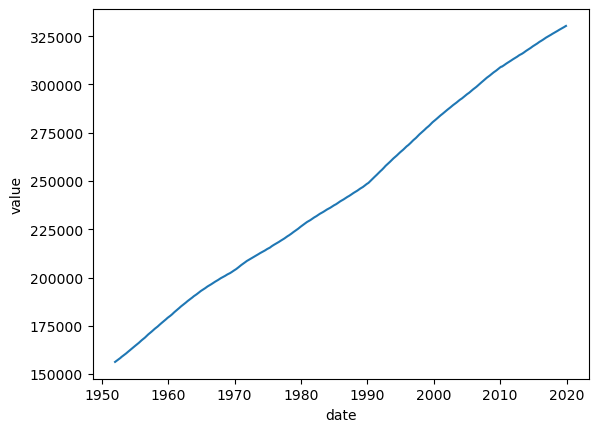

In [ ]:
sns.lineplot(x='date', y='value', data=df)

In [ ]:
# Function to convert the dataset to a timeseries (specific for datasets with only the target column used)
def create_window(target, window=1, offset=0):
    feature_new, target_new = [], []
    # Convert our series to a numpy array
    target_np = target.to_numpy()
    for index in range(window, target.shape[0] - offset):
        feature_new.append(target_np[index - window: index])
        target_new.append(target_np[index+offset])
    return np.array(feature_new), np.array(target_new)

In [ ]:
df = df.sort_values(by=['date'])
window = 5
feature, target = create_window(df['value'], window=window)
print(feature[0])
print(target[0])
print(df.head(6))

[156309. 156527. 156731. 156943. 157140.]
157343.0
  realtime_start     value       date realtime_end
0     2019-12-06  156309.0 1952-01-01   2019-12-06
1     2019-12-06  156527.0 1952-02-01   2019-12-06
2     2019-12-06  156731.0 1952-03-01   2019-12-06
3     2019-12-06  156943.0 1952-04-01   2019-12-06
4     2019-12-06  157140.0 1952-05-01   2019-12-06
5     2019-12-06  157343.0 1952-06-01   2019-12-06


In [ ]:
scaler_feature = StandardScaler()
feature_shape = feature.shape
feature_scaled = scaler_feature.fit_transform(feature)
feature_scaled[0]

array([-1.73366182, -1.73364508, -1.73390782, -1.73401296, -1.73441917])

In [ ]:
population_values = df['value'].values.reshape(-1, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
population_values_scaled = scaler.fit_transform(population_values)

In [ ]:
sequence_length = 5  # Number of previous time steps to consider
sequences = []
next_population = []
for i in range(len(population_values_scaled) - sequence_length):
    sequences.append(population_values_scaled[i:i+sequence_length])
    next_population.append(population_values_scaled[i+sequence_length])

X = np.array(sequences) # Input sequences
y = np.array(next_population)

In [ ]:
split = int(0.8 * len(X))  # 80% for training, 20% for testing
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [ ]:
model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
41/41 [==============================] - 3s 19ms/step - loss: 0.0896 - val_loss: 0.0100
Epoch 2/50
41/41 [==============================] - 0s 11ms/step - loss: 3.5099e-04 - val_loss: 2.6440e-06
Epoch 3/50
41/41 [==============================] - 1s 13ms/step - loss: 2.2932e-05 - val_loss: 1.4889e-06
Epoch 4/50
41/41 [==============================] - 1s 12ms/step - loss: 7.4473e-06 - val_loss: 3.5161e-06
Epoch 5/50
41/41 [==============================] - 1s 12ms/step - loss: 2.4079e-06 - val_loss: 8.9994e-07
Epoch 6/50
41/41 [==============================] - 0s 12ms/step - loss: 7.8109e-07 - val_loss: 1.2687e-06
Epoch 7/50
41/41 [==============================] - 1s 12ms/step - loss: 3.7686e-07 - val_loss: 2.0338e-06
Epoch 8/50
41/41 [==============================] - 0s 12ms/step - loss: 3.1294e-07 - val_loss: 1.1548e-06
Epoch 9/50
41/41 [==============================] - 1s 12ms/step - loss: 2.9232e-07 - val_loss: 1.5807e-06
Epoch 10/50
41/41 [==========================

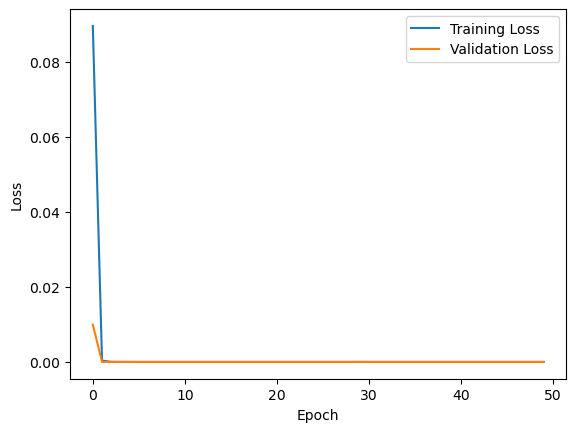

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
predictions_scaled = model.predict(X_test)
predictions = scaler.inverse_transform(predictions_scaled)

6/6 [==============================] - 0s 3ms/step


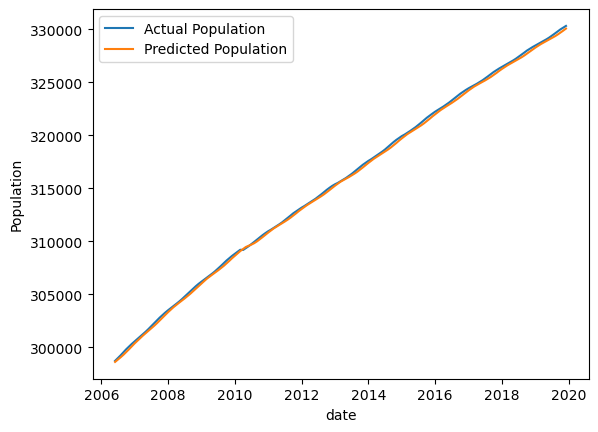

In [ ]:
plt.plot(df['date'][split+sequence_length:], df['value'][split+sequence_length:], label='Actual Population')
plt.plot(df['date'][split+sequence_length:], predictions, label='Predicted Population')
plt.xlabel('date')
plt.ylabel('Population')
plt.legend()
plt.show()
